<p style="background: linear-gradient(to right, #1E90FF, #8A2BE2); -webkit-background-clip: text; color: transparent; display:block; font-weight:bold; font-size:40px;">
Python Final Report & Visualizations
</p>

<p style="background: linear-gradient(to right, #1E90FF, #8A2BE2); -webkit-background-clip: text; color: transparent; display:block;">
1. Retrieve Analysis Results<br>
- Fetch analysis results from SQL Server into Pandas
</p>

<p style="background: linear-gradient(to right, #1E90FF, #8A2BE2); -webkit-background-clip: text; color: transparent; display:block;">
2. Generate Plots<br>
- Visualize analysis for:<br>
  - Top products<br>
  - Top customers<br>
  - Revenue per store<br>
  - Revenue per category<br>
  - Monthly sales trend<br>
  - Low stock products<br>
  - Staff performance<br>
  - Average spending per customer
</p>

<p style="background: linear-gradient(to right, #1E90FF, #8A2BE2); -webkit-background-clip: text; color: transparent; display:block;">
3. Save Final Report<br>
- Save final results to CSV<br>
- Organize visualizations for reporting
</p>

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

server = "DESKTOP-05DRQII"
database = "RetailDB"
driver = "ODBC Driver 17 for SQL Server"

engine = create_engine(f"mssql+pyodbc://@{server}/{database}?driver={driver}&trusted_connection=yes")


In [ ]:
# Top 10 best-selling products
top_products = pd.read_sql("""
SELECT TOP 10 
    p.product_name,
    SUM(oi.quantity) AS total_quantity_sold,
    SUM(oi.total_price) AS total_sales
FROM OrderItems oi
JOIN Products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity_sold DESC
""", engine)


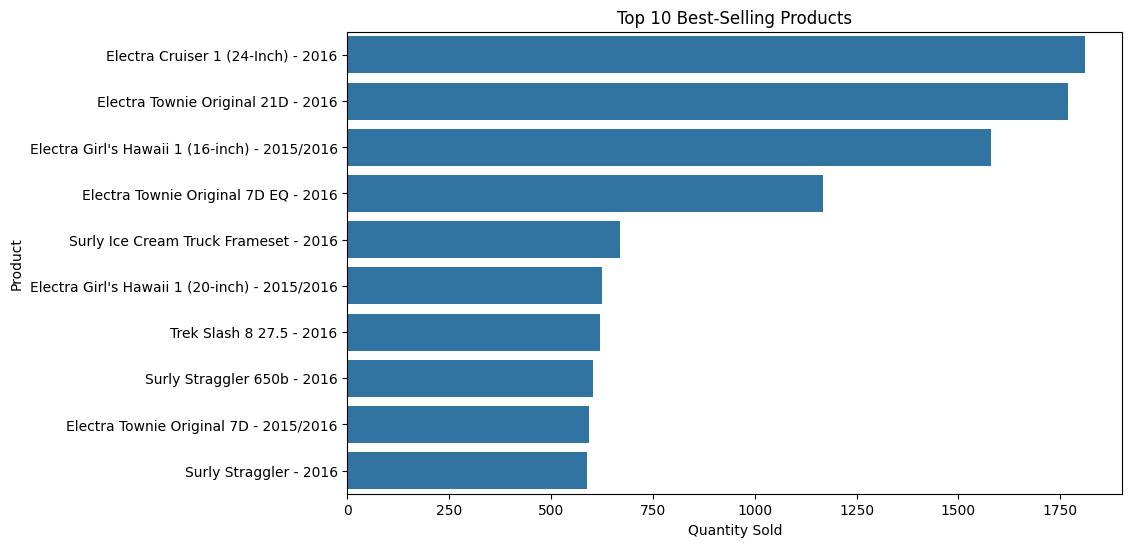

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x="total_quantity_sold", y="product_name", data=top_products)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.show()


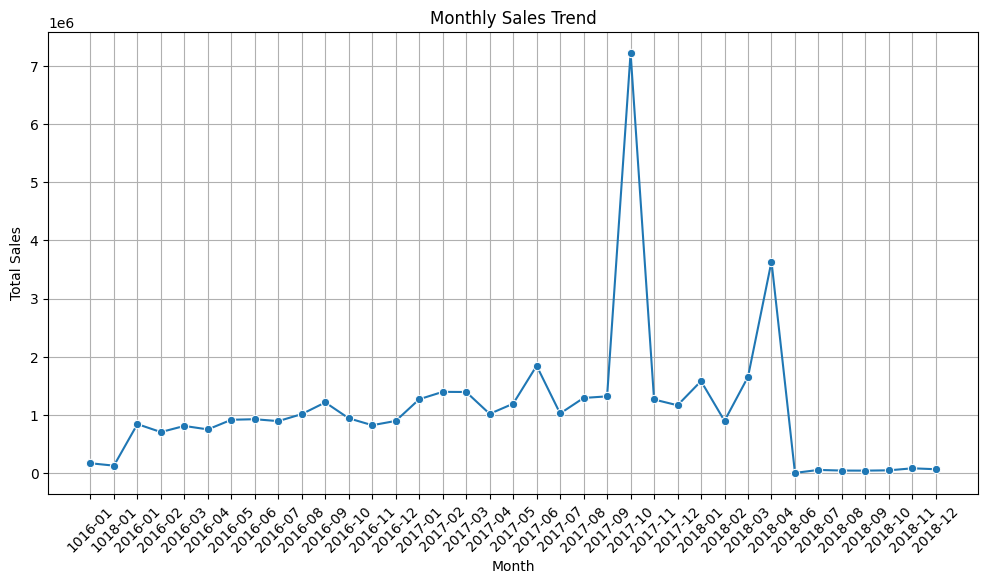

In [ ]:
#  جلب بيانات Monthly Sales Trend من SQL
monthly_sales = pd.read_sql("""
    SELECT
        FORMAT(CONVERT(DATE, o.order_date), 'yyyy-MM') AS month,
        SUM(oi.total_price) AS total_sales
    FROM Orders o
    JOIN OrderItems oi ON o.order_id = oi.order_id
    GROUP BY FORMAT(CONVERT(DATE, o.order_date), 'yyyy-MM')
    ORDER BY month;
""", engine)

plt.figure(figsize=(12,6))
sns.lineplot(x="month", y="total_sales", data=monthly_sales, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\Press Any Key\AppData\Local\Temp\ipykernel_10496\1464491665.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_revenue", y="store_name", data=revenue_per_store, palette="magma", ax=axes[0])
C:\Users\Press Any Key\AppData\Local\Temp\ipykernel_10496\1464491665.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_revenue", y="category_name", data=revenue_per_category, palette="coolwarm", ax=axes[1])
C:\Users\Press Any Key\AppData\Local\Temp\ipykernel_10496\1464491665.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barp

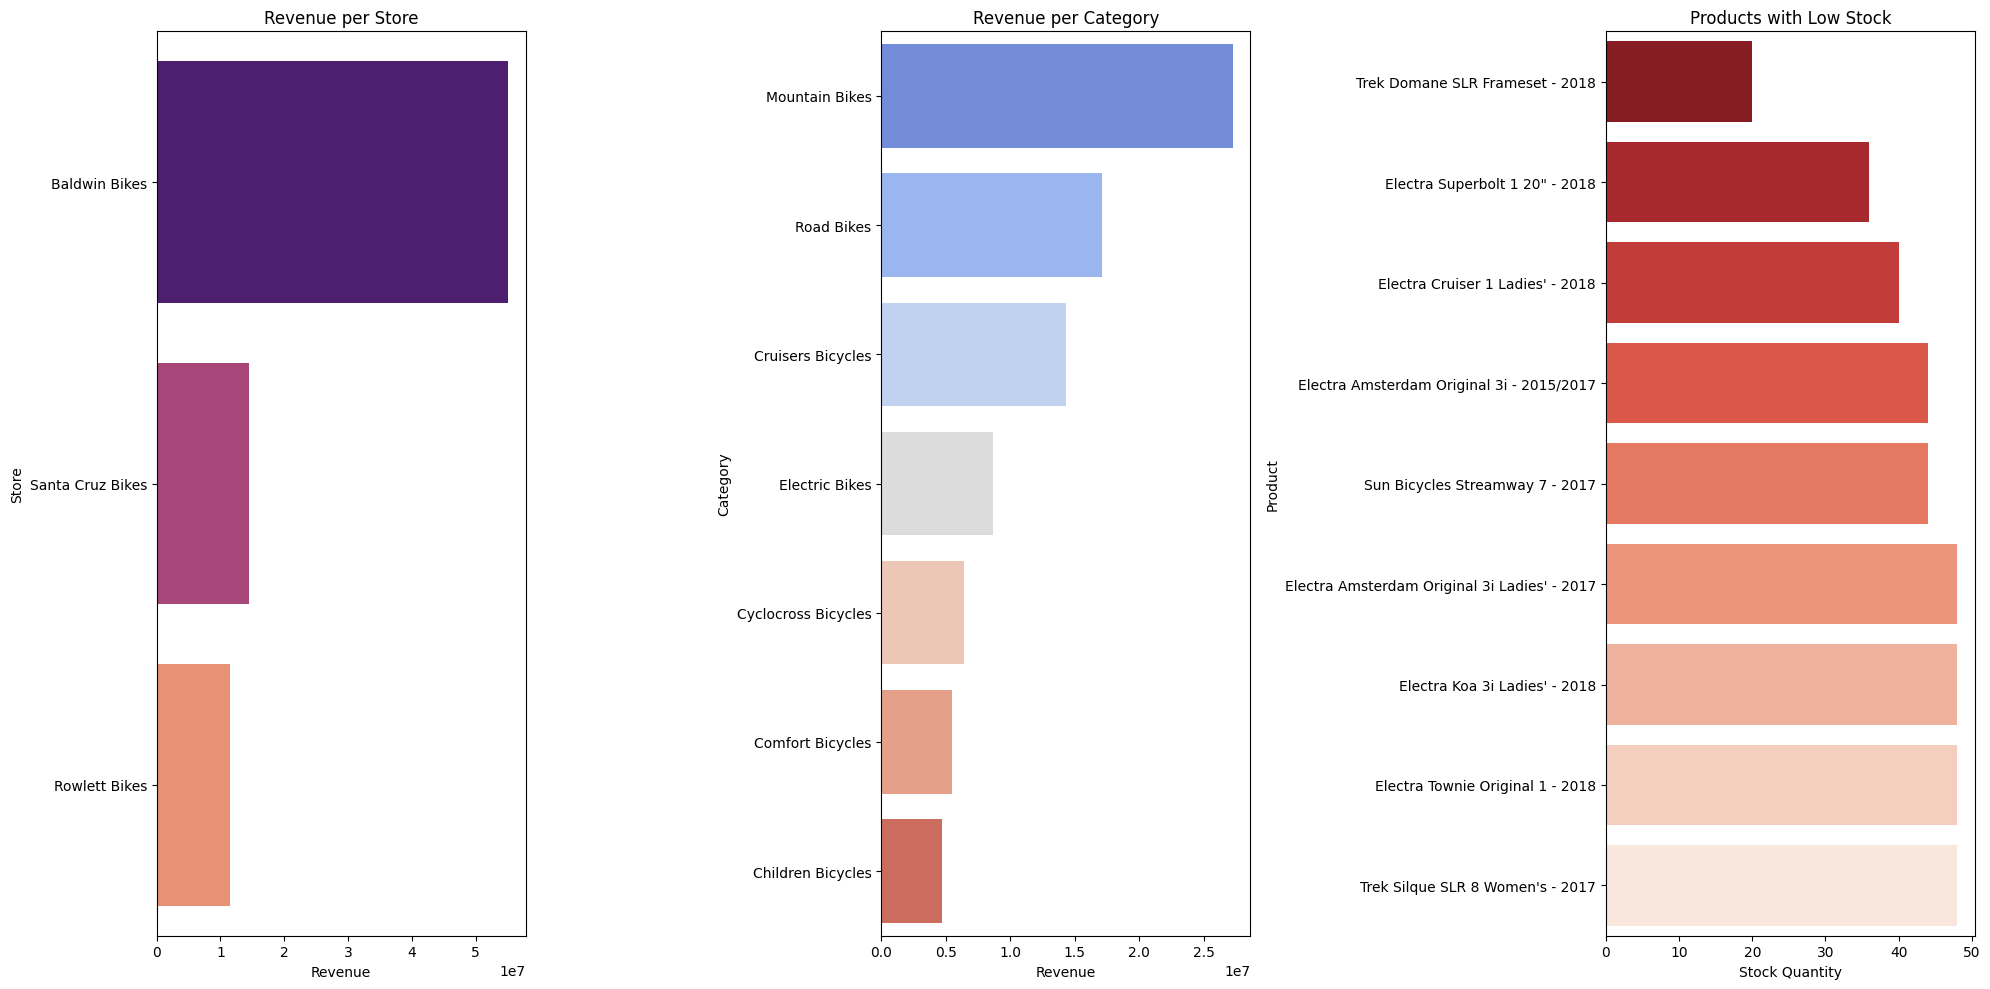

In [19]:
#  جلب البيانات المطلوبة من SQL
revenue_per_store = pd.read_sql("""
    SELECT
        s.store_name,
        SUM(oi.total_price) AS total_revenue
    FROM Orders o
    JOIN Stores s ON o.store_id = s.store_id
    JOIN OrderItems oi ON o.order_id = oi.order_id
    GROUP BY s.store_name
    ORDER BY total_revenue DESC;
""", engine)

revenue_per_category = pd.read_sql("""
    SELECT
        c.category_name,
        SUM(oi.total_price) AS total_revenue
    FROM OrderItems oi
    JOIN Products p ON oi.product_id = p.product_id
    JOIN Categories c ON p.category_id = c.category_id
    GROUP BY c.category_name
    ORDER BY total_revenue DESC;
""", engine)

low_stock = pd.read_sql("""
    SELECT
        p.product_name,
        SUM(s.quantity) AS total_stock
    FROM Stocks s
    JOIN Products p ON s.product_id = p.product_id
    GROUP BY p.product_name
    HAVING SUM(s.quantity) < 50
    ORDER BY total_stock ASC;
""", engine)


fig, axes = plt.subplots(1, 3, figsize=(20,10))  

# Revenue per Store
sns.barplot(x="total_revenue", y="store_name", data=revenue_per_store, palette="magma", ax=axes[0])
axes[0].set_title("Revenue per Store")
axes[0].set_xlabel("Revenue")
axes[0].set_ylabel("Store")

# Revenue per Category
sns.barplot(x="total_revenue", y="category_name", data=revenue_per_category, palette="coolwarm", ax=axes[1])
axes[1].set_title("Revenue per Category")
axes[1].set_xlabel("Revenue")
axes[1].set_ylabel("Category")

# Low Stock Products
sns.barplot(x="total_stock", y="product_name", data=low_stock, palette="Reds_r", ax=axes[2])
axes[2].set_title("Products with Low Stock")
axes[2].set_xlabel("Stock Quantity")
axes[2].set_ylabel("Product")

plt.tight_layout()  
plt.show()


_______________

<p style="background: linear-gradient(to right, #1E90FF, #8A2BE2); -webkit-background-clip: text; color: transparent; display:block; font-weight:bold; font-size:30px;">
The End ✨
</p>